# Error in keras 

conda install -c anaconda h5py

* WRITE THIS WAY 
from tensorflow.keras.models import Sequential


In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D # 1 
from keras.layers import MaxPooling2D #2
from keras.layers import Flatten #3
from keras.layers import Dense #4 FULLY CONNECTED LAYER 

In [17]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) # AVERAGE = FILTER HIGHER NUMBER 

# Step 3 -  convolutional layer
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 4 - Flattening
classifier.add(Flatten())  #one dimensional

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))  # hidden layer 1
classifier.add(Dense(units = 64, activation = 'relu')) # hidden layer 2

classifier.add(Dense(units = 1, activation = 'sigmoid')) #output Layer 


In [18]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [21]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\user\OneDrive\Desktop\data science\dataset\training_set',
                                                 target_size = (64, 64), # image size reduce
                                                 batch_size = 32, # group
                                                 class_mode='binary') 

test_set = test_datagen.flow_from_directory(r'C:\Users\user\OneDrive\Desktop\data science\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode='binary') 

Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [22]:
training_set.class_indices

{'addidas': 0, 'nike': 1}

In [23]:
100/32

3.125

In [24]:
import warnings 
warnings.filterwarnings("ignore")

In [25]:
result=classifier.fit(training_set,
                         epochs=50, #repeat
                         validation_data = test_set)

Epoch 1/50
4/4 [==============================] - 23s 375ms/step - loss: 0.6982 - accuracy: 0.4378 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 103ms/step - loss: 0.6913 - accuracy: 0.4854 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 104ms/step - loss: 0.6892 - accuracy: 0.4689 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 102ms/step - loss: 0.6828 - accuracy: 0.5121 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 125ms/step - loss: 0.6775 - accuracy: 0.5641 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 106ms/step - loss: 0.6789 - accuracy: 0.5135 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 129ms/step - loss: 0.6739 - accuracy: 0.5225 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 8/50
4/4 [===

In [26]:
classifier.save('addi_nike_classifier.h5')

!pip install opencv-python-headless==4.5.2.52

In [28]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2  # pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
model=load_model("addi_nike_classifier.h5")

In [30]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    prediction= model.predict_classes(raw_img)[0][0]
    Probability = model.predict(raw_img)[0][0]
    #prediction = (model.predict(raw_img) > 0.5).astype("int32  # new tensorflow version
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if prediction:
        print("its a Nike")
    else:
        print("its a Adidas")

In [31]:
import os
os.getcwd()

'C:\\Users\\user\\OneDrive\\Desktop\\data science'

Probability 0.9958624
its a Nike


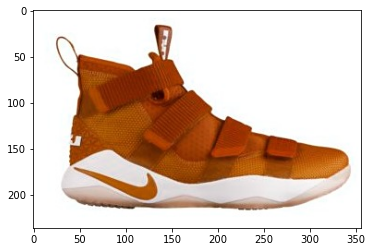

In [48]:
model_output("WhatsApp Image 2022-06-25 at 7.16.42 PM.jpeg")

Probability 0.30046204
its a Adidas


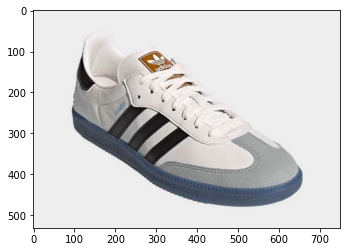

In [49]:
model_output("WhatsApp Image 2022-06-25 at 7.16.43 PM (1).jpeg")

Probability 0.97214985
its a Nike


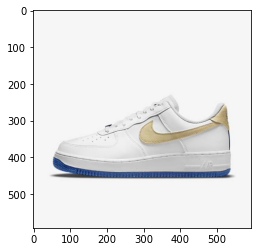

In [50]:
model_output("WhatsApp Image 2022-06-25 at 7.16.43 PM.jpeg")

Probability 0.022739023
its a Adidas


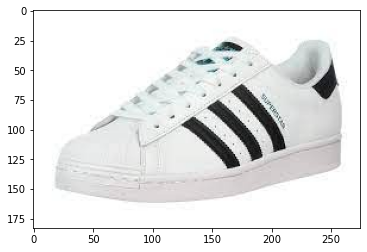

In [51]:
model_output("demo4.jpg")

# Finish